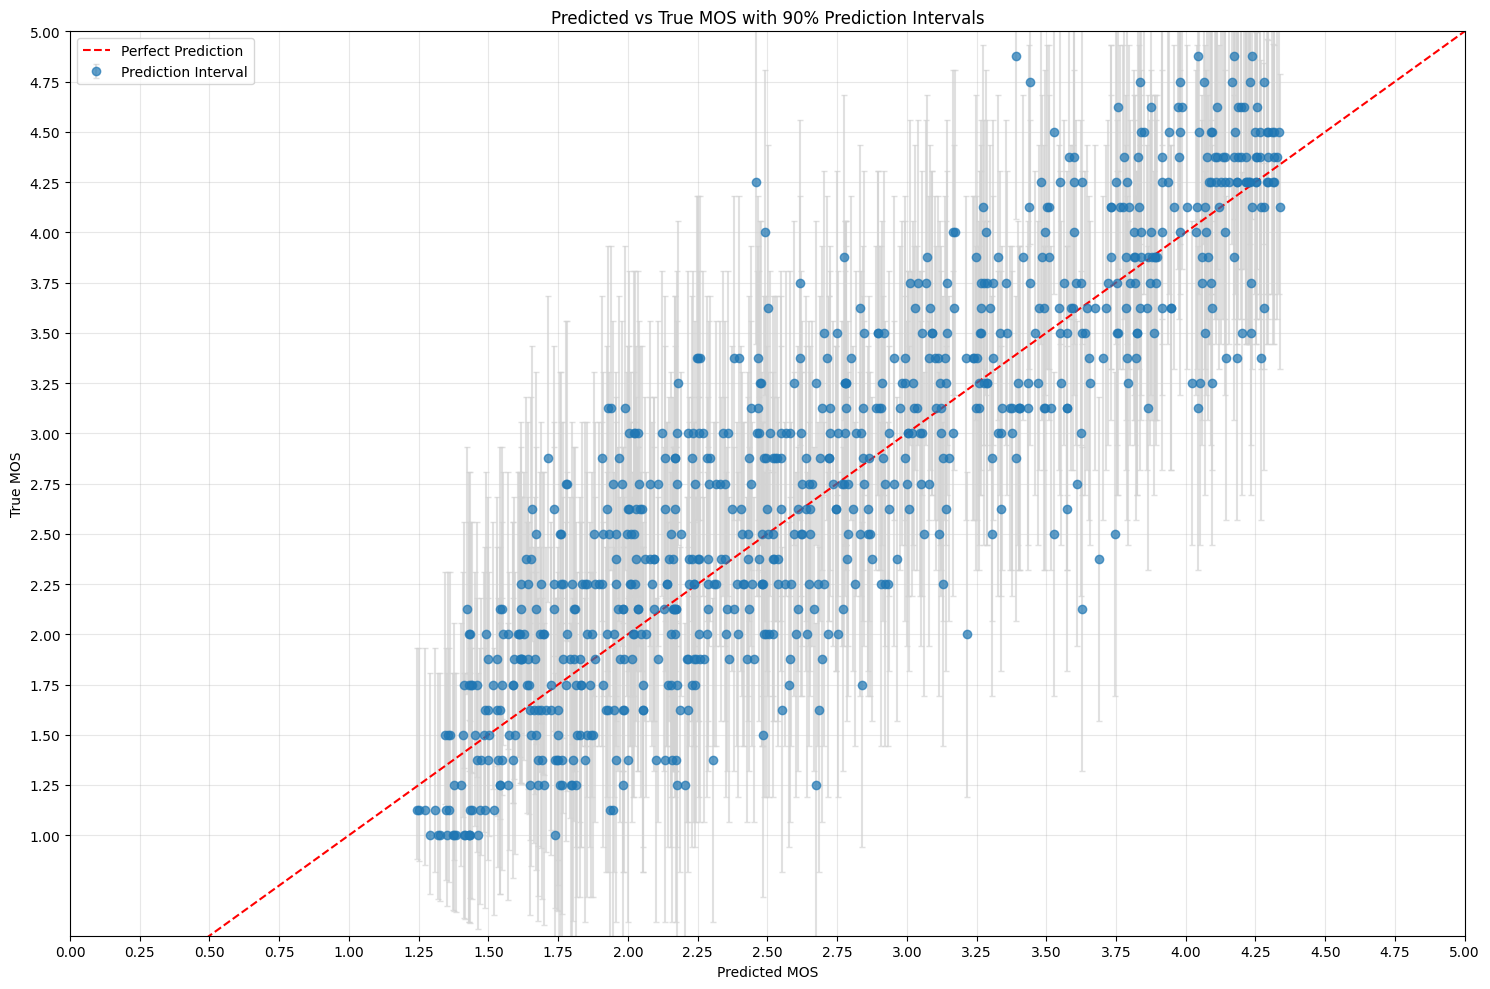

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load CSV
df = pd.read_csv("/egr/research-deeptech/elelukeh/MOS_project/ConvM2D2V2/result/m2d_predictions_run_20250917_160208.csv")  # replace with your CSV path

# Calculate error bars (distance from predicted MOS to lower and upper bounds)
yerr_lower = df['pred_overall'] - df['lower']
yerr_upper = df['upper'] - df['pred_overall']
yerr = [yerr_lower, yerr_upper]

# Create scatter plot with vertical error bars (PIs)
plt.figure(figsize=(15, 10))
plt.errorbar(df['pred_overall'], df['truth_overall'],
             yerr=yerr,
             fmt='o', ecolor='lightgray', elinewidth=1.5, capsize=2,
             alpha=0.7, label='Prediction Interval')

# Add diagonal reference line (perfect prediction)
plt.plot([0, 5], [0, 5],
         color='red', linestyle='--', label='Perfect Prediction')

# Labels and title
plt.xlabel('Predicted MOS')
plt.ylabel('True MOS')
plt.title('Predicted vs True MOS with 90% Prediction Intervals')
plt.legend()
plt.grid(alpha=0.3)

plt.xlim(1, 5)
plt.ylim(0.5, 5)

# Set x and y axis ticks to intervals of 0.25
plt.xticks(np.arange(0, 5.25, 0.25))
plt.yticks(np.arange(1, 5.25, 0.25))

plt.tight_layout()

In [ ]:
# write a latex result in less than 200words for the above result 
# what can you observe, any trend or interesting information

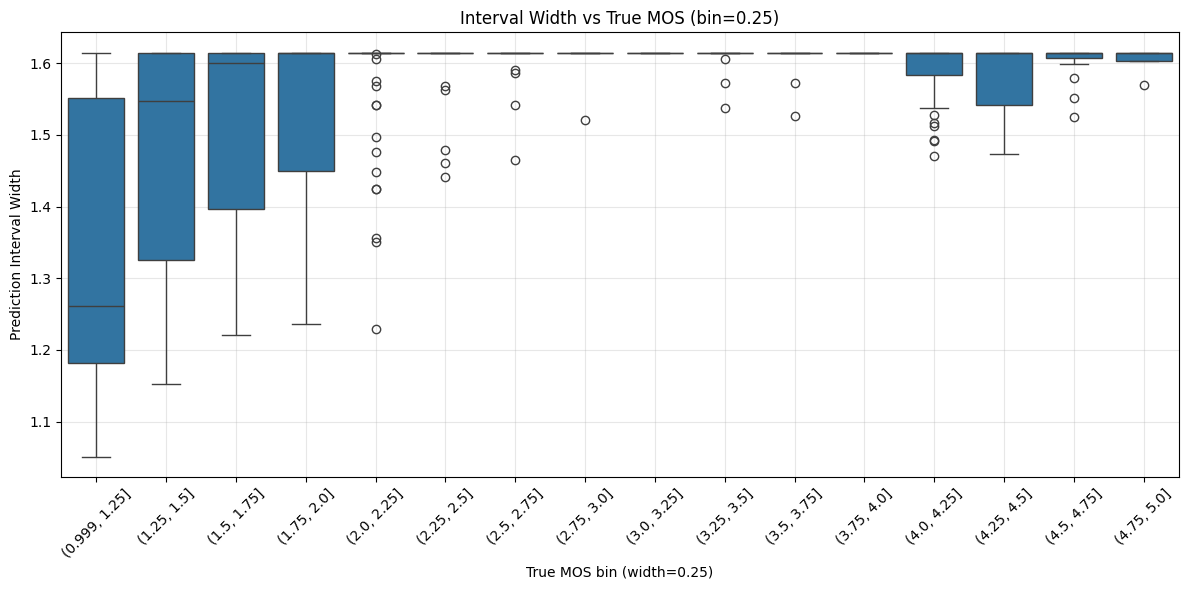

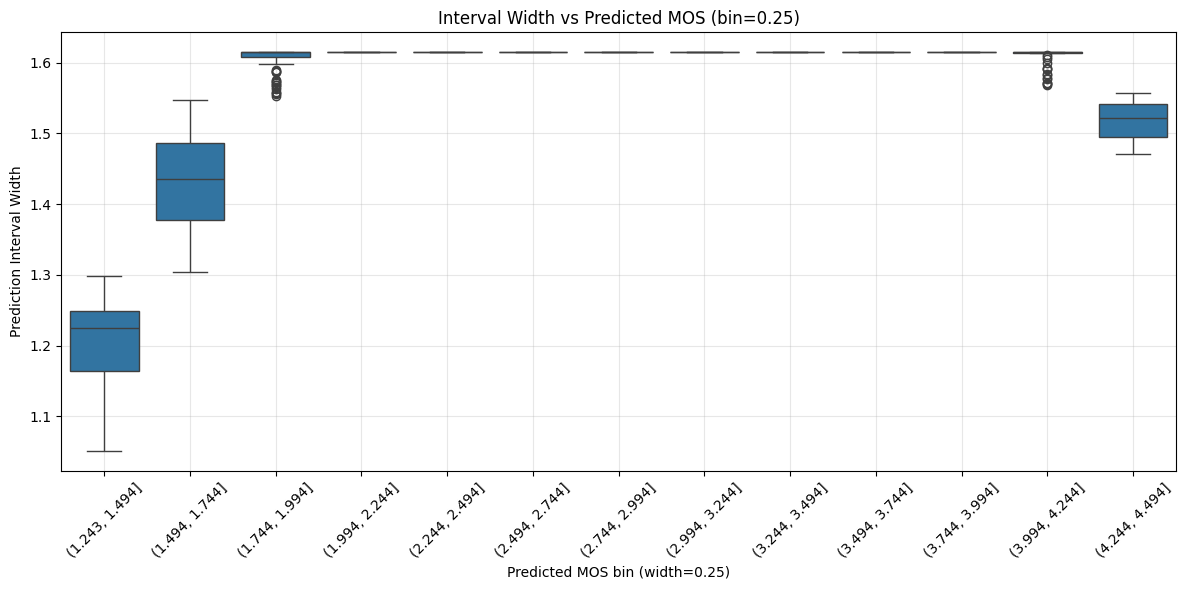

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load CSV
df = pd.read_csv("/egr/research-deeptech/elelukeh/MOS_project/ConvM2D2V2/result/m2d_predictions_run_20250917_160208.csv")

# Compute interval width
df['width'] = df['upper'] - df['lower']

# Bin edges with width 0.25
true_bins = np.arange(df['truth_overall'].min(), df['truth_overall'].max() + 0.25, 0.25)
pred_bins = np.arange(df['pred_overall'].min(), df['pred_overall'].max() + 0.25, 0.25)

# Bin true and predicted MOS
df['true_bin'] = pd.cut(df['truth_overall'], bins=true_bins, include_lowest=True)
df['pred_bin'] = pd.cut(df['pred_overall'], bins=pred_bins, include_lowest=True)

# Boxplot: Interval width vs true MOS bins
plt.figure(figsize=(12,6))
sns.boxplot(x='true_bin', y='width', data=df)
plt.xlabel('True MOS bin (width=0.25)')
plt.ylabel('Prediction Interval Width')
plt.title('Interval Width vs True MOS (bin=0.25)')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Boxplot: Interval width vs predicted MOS bins
plt.figure(figsize=(12,6))
sns.boxplot(x='pred_bin', y='width', data=df)
plt.xlabel('Predicted MOS bin (width=0.25)')
plt.ylabel('Prediction Interval Width')
plt.title('Interval Width vs Predicted MOS (bin=0.25)')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

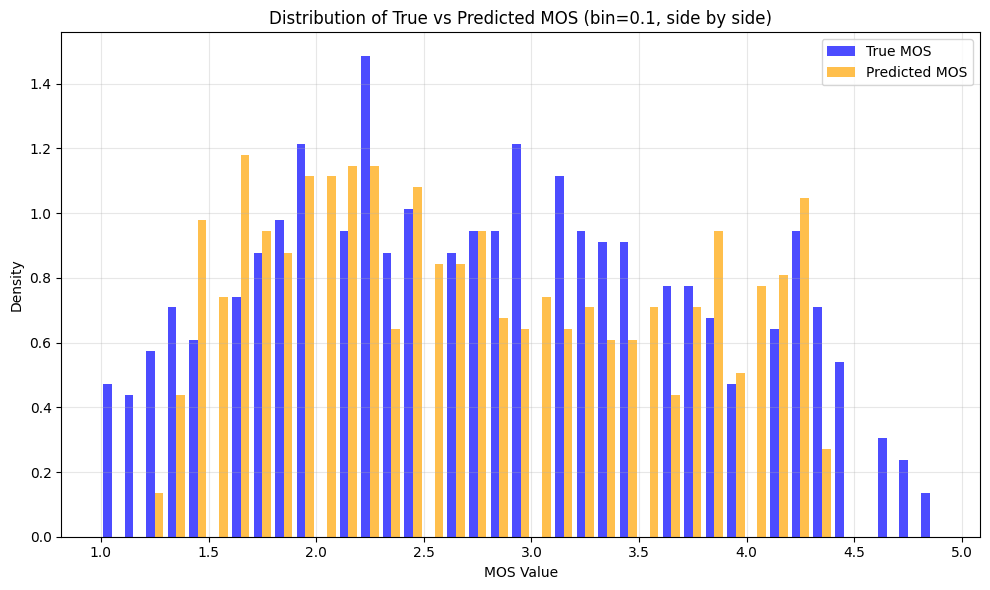

In [28]:
# ...existing code...

import matplotlib.pyplot as plt
import numpy as np

# Define bins for x-axis with width 0.1
min_val = min(df['truth_overall'].min(), df['pred_overall'].min())
max_val = max(df['truth_overall'].max(), df['pred_overall'].max())
bins = np.arange(min_val, max_val + 0.1, 0.1)

plt.figure(figsize=(10,6))
width = 0.04  # bar width for side-by-side

# Calculate histogram values
truth_hist, _ = np.histogram(df['truth_overall'], bins=bins)
pred_hist, _ = np.histogram(df['pred_overall'], bins=bins)

# Calculate bin centers
bin_centers = (bins[:-1] + bins[1:]) / 2

# Normalize for density
truth_density = truth_hist / (np.sum(truth_hist) * width)
pred_density = pred_hist / (np.sum(pred_hist) * width)

# Plot side-by-side bars
plt.bar(bin_centers - width/2, truth_density, width=width, color='blue', alpha=0.7, label='True MOS')
plt.bar(bin_centers + width/2, pred_density, width=width, color='orange', alpha=0.7, label='Predicted MOS')

plt.xlabel('MOS Value')
plt.ylabel('Density')
plt.title('Distribution of True vs Predicted MOS (bin=0.1, side by side)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
# ...existing code...

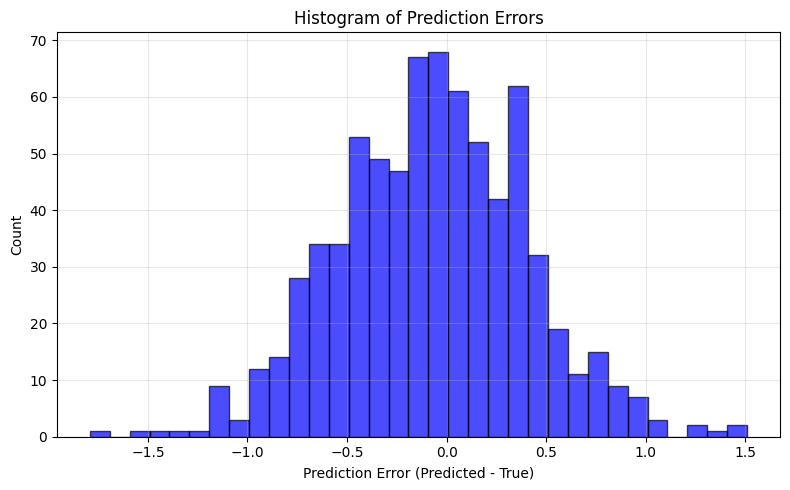

In [30]:
# ...existing code...

import matplotlib.pyplot as plt
import numpy as np

# Calculate errors
errors = df['pred_overall'] - df['truth_overall']

# Plot error histogram
plt.figure(figsize=(8,5))
bins = np.arange(errors.min(), errors.max() + 0.1, 0.1)
plt.hist(errors, bins=bins, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Prediction Error (Predicted - True)')
plt.ylabel('Count')
plt.title('Histogram of Prediction Errors')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
#

In [ ]:
# A symmetrical bell-shaped error histogram means your predictions are unbiased and the errors are distributed normally around zero. This suggests:

# Your model does not systematically overpredict or underpredict.
# Most predictions are close to the true values, with fewer large errors.
# The prediction errors are random and not skewed.

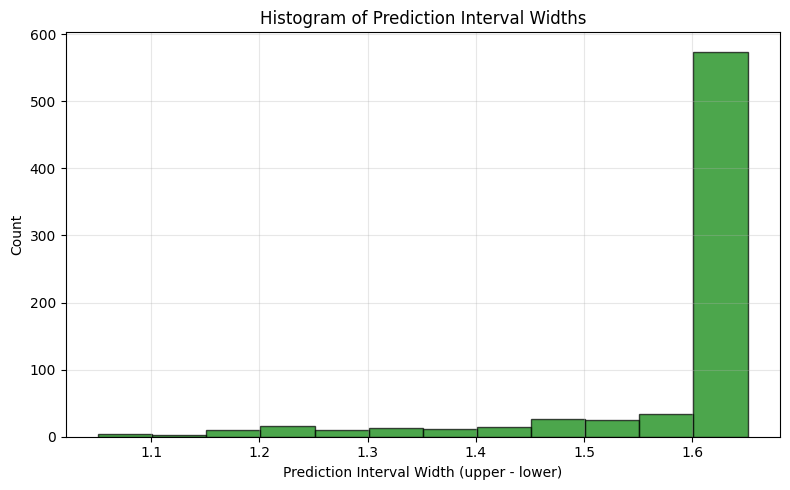

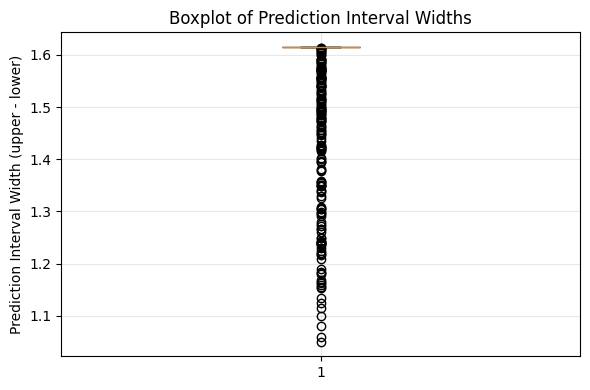

In [ ]:
# ...existing code...

import matplotlib.pyplot as plt
import numpy as np

# Calculate prediction interval widths
interval_widths = df['upper'] - df['lower']

# Plot histogram of interval widths
plt.figure(figsize=(8,5))
bins = np.arange(interval_widths.min(), interval_widths.max() + 0.05, 0.05)
plt.hist(interval_widths, bins=bins, color='green', alpha=0.7, edgecolor='black')
plt.xlabel('Prediction Interval Width (upper - lower)')
plt.ylabel('Count')
plt.title('Histogram of Prediction Interval Widths')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot boxplot of interval widths
plt.figure(figsize=(6,4))
plt.boxplot(interval_widths, vert=True, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.ylabel('Prediction Interval Width (upper - lower)')
plt.title('Boxplot of Prediction Interval Widths')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



# If the prediction interval widths histogram is right-skewed (most intervals are small, but some are much larger), it means:

# Most predictions are made with high confidence (narrow intervals).
# A few predictions are much less certain (wide intervals).
# Your model is generally confident, but there are some cases where it is unsure.

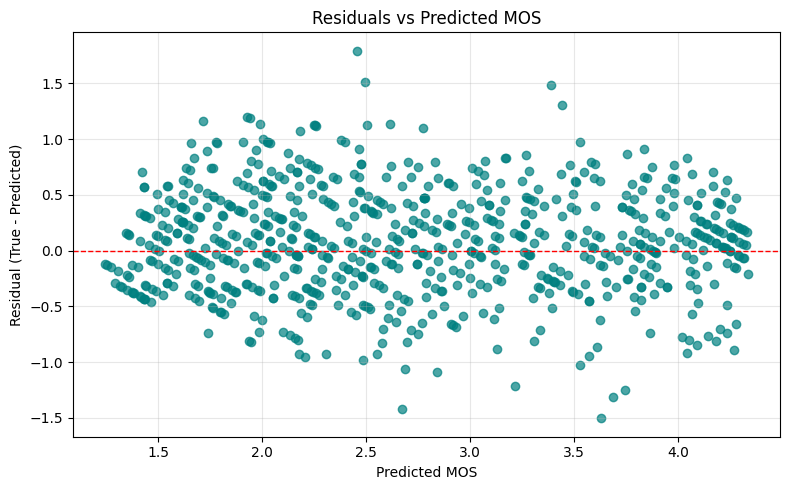

In [32]:
# ...existing code...

import matplotlib.pyplot as plt

# Calculate residuals
residuals = df['truth_overall'] - df['pred_overall']

# Scatter plot: residuals vs predicted MOS
plt.figure(figsize=(8,5))
plt.scatter(df['pred_overall'], residuals, color='teal', alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Predicted MOS')
plt.ylabel('Residual (True - Predicted)')
plt.title('Residuals vs Predicted MOS')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Overall coverage: 91.63%


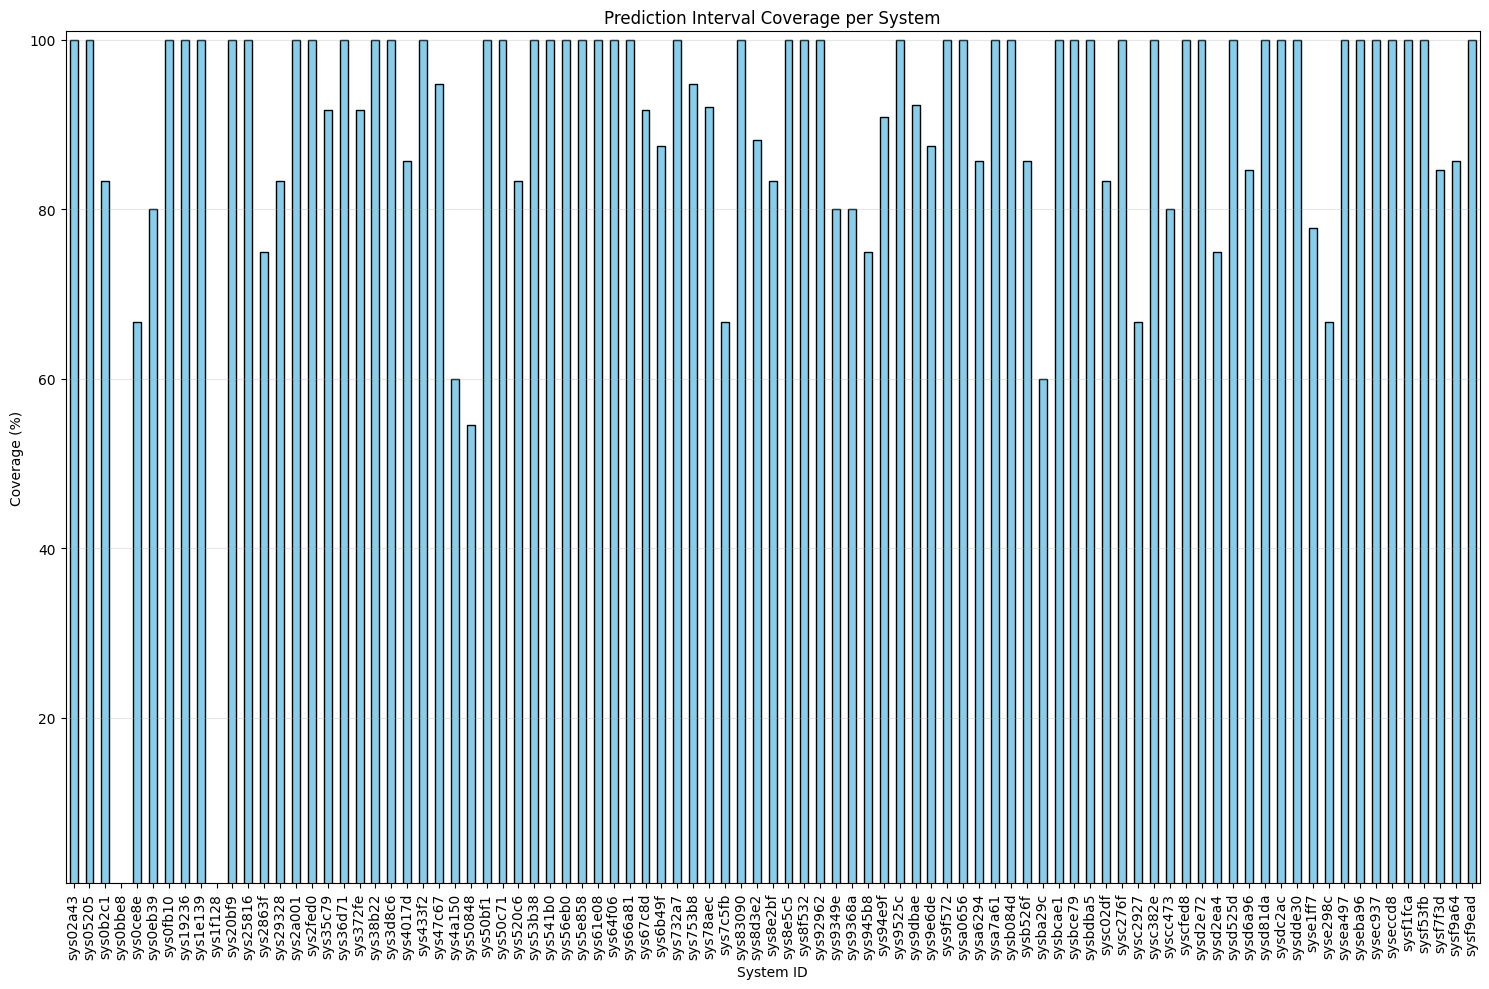

In [38]:
# ...existing code...

import matplotlib.pyplot as plt

# Calculate coverage: does truth_overall fall within [lower, upper]?
df['covered'] = (df['truth_overall'] >= df['lower']) & (df['truth_overall'] <= df['upper'])

# Overall coverage percentage
overall_coverage = df['covered'].mean() * 100
print(f"Overall coverage: {overall_coverage:.2f}%")

# Coverage per system
coverage_per_system = df.groupby('system_id')['covered'].mean() * 100

# Bar plot: coverage per system
plt.figure(figsize=(15,10))
coverage_per_system.plot(kind='bar', color='skyblue', edgecolor='black')
plt.ylabel('Coverage (%)')
plt.xlabel('System ID')
plt.title('Prediction Interval Coverage per System')
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# plt.xlim(1, 5)
plt.ylim(0.5, 101)


plt.show()

/tmp/ipykernel_3593151/427851726.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calibration = df.groupby('pred_bin')['truth_overall'].mean()


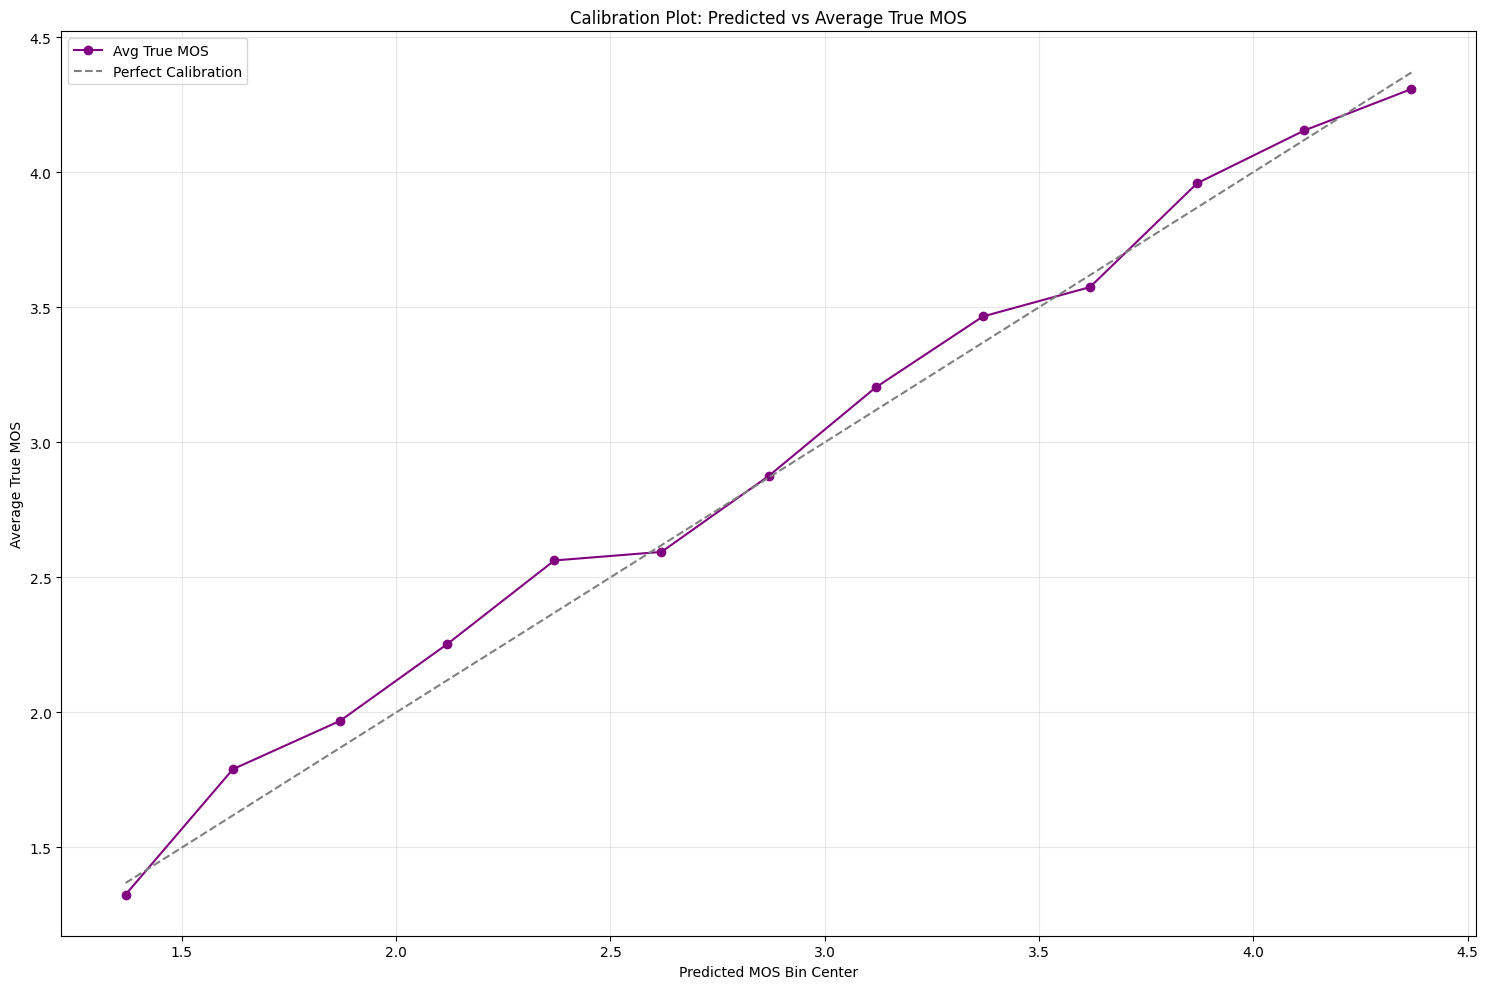

In [40]:
# ...existing code...

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Bin predicted MOS values (width=0.25)
bins = np.arange(df['pred_overall'].min(), df['pred_overall'].max() + 0.25, 0.25)
df['pred_bin'] = pd.cut(df['pred_overall'], bins=bins, include_lowest=True)

# Calculate average true MOS for each predicted bin
calibration = df.groupby('pred_bin')['truth_overall'].mean()

# Calculate bin centers for plotting
bin_centers = [interval.mid for interval in calibration.index]

plt.figure(figsize=(15,10))
plt.plot(bin_centers, calibration.values, marker='o', linestyle='-', color='purple', label='Avg True MOS')
plt.plot(bin_centers, bin_centers, linestyle='--', color='gray', label='Perfect Calibration')
plt.xlabel('Predicted MOS Bin Center')
plt.ylabel('Average True MOS')
plt.title('Calibration Plot: Predicted vs Average True MOS')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
#

/tmp/ipykernel_3593151/793765269.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calibration = df.groupby('pred_bin')['truth_overall'].mean()


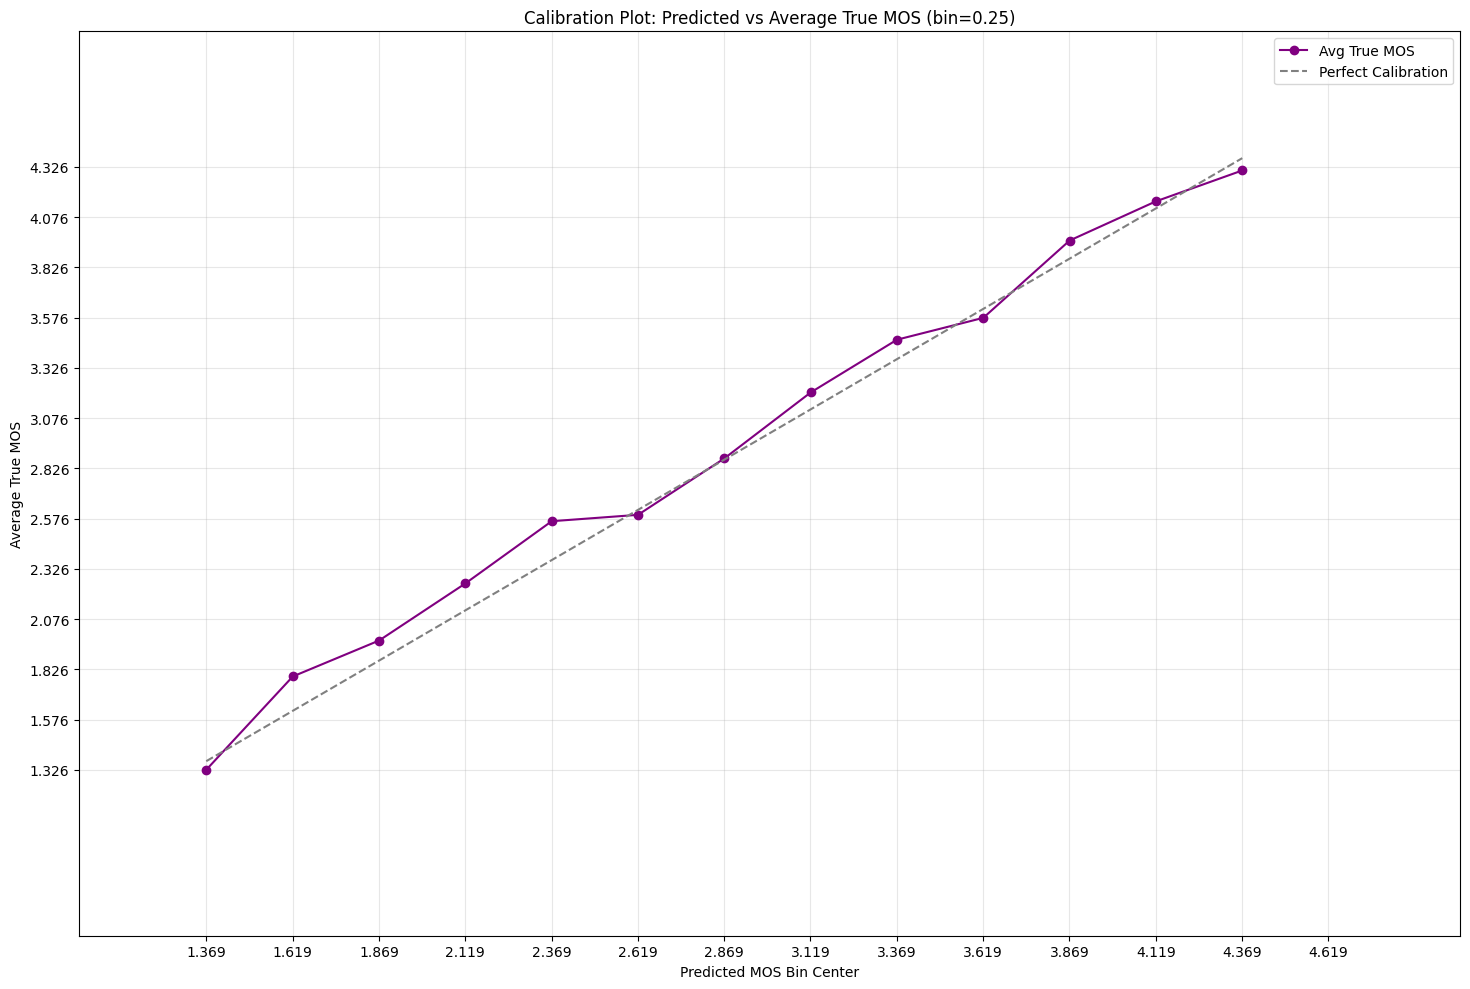

In [45]:
# ...existing code...

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Divide predicted MOS into bins of width 0.25
bins = np.arange(df['pred_overall'].min(), df['pred_overall'].max() + 0.25, 0.25)
df['pred_bin'] = pd.cut(df['pred_overall'], bins=bins, include_lowest=True)

# Calculate average true MOS for each predicted bin
calibration = df.groupby('pred_bin')['truth_overall'].mean()

# Calculate bin centers for plotting
bin_centers = [interval.mid for interval in calibration.index]

plt.figure(figsize=(15,10))
plt.plot(bin_centers, calibration.values, marker='o', linestyle='-', color='purple', label='Avg True MOS')
plt.plot(bin_centers, bin_centers, linestyle='--', color='gray', label='Perfect Calibration')
plt.xlabel('Predicted MOS Bin Center')
plt.ylabel('Average True MOS')
plt.title('Calibration Plot: Predicted vs Average True MOS (bin=0.25)')
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(np.arange(min(bin_centers), max(bin_centers)+0.25, 0.25))
plt.yticks(np.arange(min(calibration.values), max(calibration.values)+0.25, 0.25))
plt.tight_layout()

plt.xlim(1, 5)
plt.ylim(0.5, 5)

plt.show()
# ...existing

In [46]:
# Calculate coverage: proportion of samples where truth_overall falls within [lower, upper]
coverage = ((df['truth_overall'] >= df['lower']) & (df['truth_overall'] <= df['upper'])).mean()
print(f"Coverage: {coverage * 100:.2f}%")

Coverage: 91.63%


In [48]:
# ...existing code...

# Calculate coverage: proportion of samples where truth_overall falls within [lower, upper]
coverage = ((df['truth_overall'] >= df['lower']) & (df['truth_overall'] <= df['upper'])).mean()

# Set nominal coverage level (e.g., for 90% intervals, alpha=0.1)
alpha = 0.1
nominal_coverage = 1 - alpha

# Calculate calibration error
calibration_error = abs(coverage - nominal_coverage)
print(f"Coverage: {coverage * 100:.2f}%")
print(f"Calibration Error: {calibration_error:.4f}")

# ...existing code...

Coverage: 91.63%
Calibration Error: 0.0163


In [50]:
# ...existing code...

import numpy as np

# Calculate half-widths of intervals
half_widths = (df['upper'] - df['lower']) / 2

# Sharpness (RMS Radius): root-mean-square of half-widths
sharpness_rms = np.sqrt(np.mean(half_widths ** 2))
print(f"Sharpness (RMS Radius): {sharpness_rms:.4f}")

#

Sharpness (RMS Radius): 0.7864


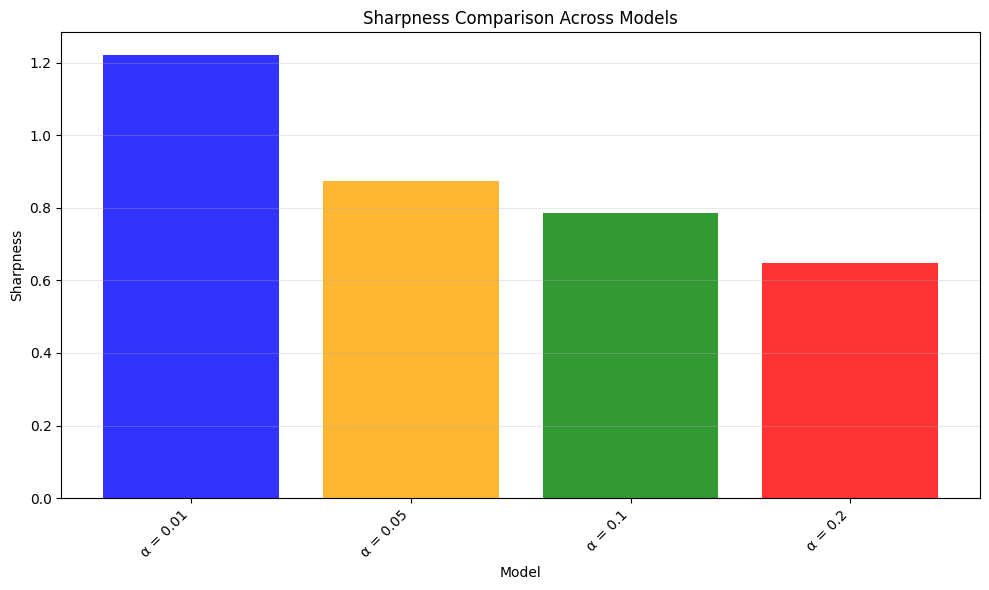

In [3]:
import matplotlib.pyplot as plt

# Data for sharpness values
models = [
    "α = 0.01",
    "α = 0.05",
    "α = 0.1",
    "α = 0.2"
]
sharpness_values = [1.222, 0.875, 0.786, 0.647]

# Colors for each bar
colors = ['blue', 'orange', 'green', 'red']

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, sharpness_values, color=colors, alpha=0.8)
plt.xlabel('Model')
plt.ylabel('Sharpness')
plt.title('Sharpness Comparison Across Models')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()